Student name: Ku, Shih-Chieh<br>
Student ID: 8906826

# Lab 8 and Lab 9 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

The goal of this lab is to run a good EDA on fMNIST, train a neural network using Tensorflow, evaluate it using sklearn, and provide clear conclusions.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import heapq

In [50]:
train = pd.read_csv('./data/fashion-mnist_train.csv')
test = pd.read_csv('./data/fashion-mnist_test.csv')

In [51]:
train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the dataset to train-validation-test.

In [52]:
X_test = test.drop(columns="label")
y_test = test["label"]


X_train, X_validation, y_train, y_validation = train_test_split(train.drop(columns="label"), train["label"], test_size=0.2, random_state=66)

### EDA

> I referenced couple of methods from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb, gathered by Professor Ran and authored by his outstanding student.

In [53]:
def plot_digit(image_data):
    plt.imshow(image_data, cmap="binary")
    plt.axis("off")

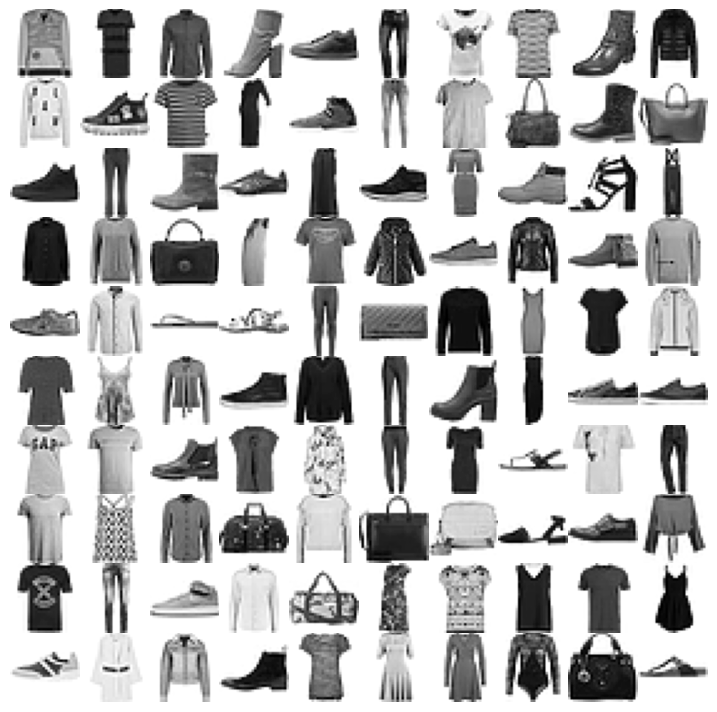

In [54]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb
i = 0

plt.figure(figsize=(9, 9))
for idx, image_data in X_train[:100].iterrows():
    image_data = image_data.values.reshape(28, 28)
    plt.subplot(10, 10, i + 1)
    plot_digit(image_data)
    i += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

>First of all, I printed out the top 100 data to observe all types of images and gain a preliminary understanding of the dataset. Based on the results, I found that there are three types of long-sleeved clothing, one type of shirt, one type of purse, one type of pants, one type of dress, and three types of shoes.

In [55]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb

def visualize_input(i, ax, y):
    img = X_train[i : i + 1].values[0].reshape(28, 28)
    
    print(img.shape)
    ax.imshow(img, cmap="gray")
    # ax.set_title(f"Label No : {y[i]}")
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(
                str(img[x][y]),
                xy=(y, x),
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if img[x][y] < thresh else "black",
            )
    ax.set_xticks([])
    ax.set_yticks([])

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


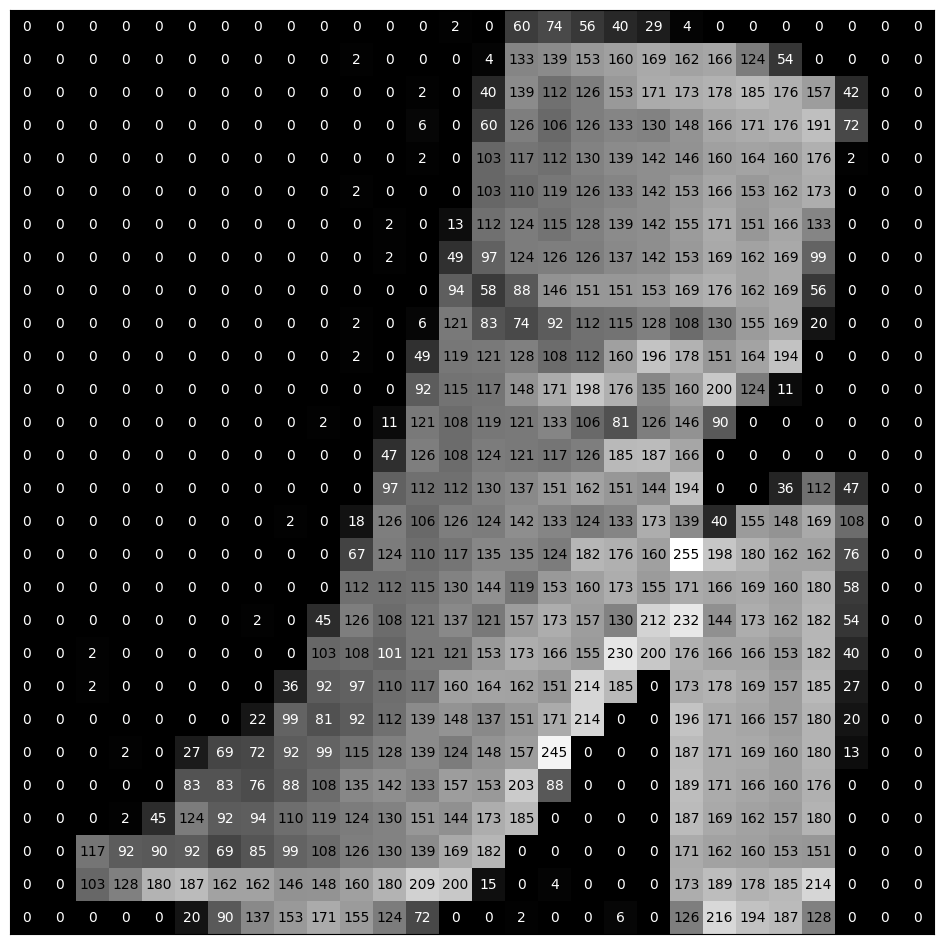

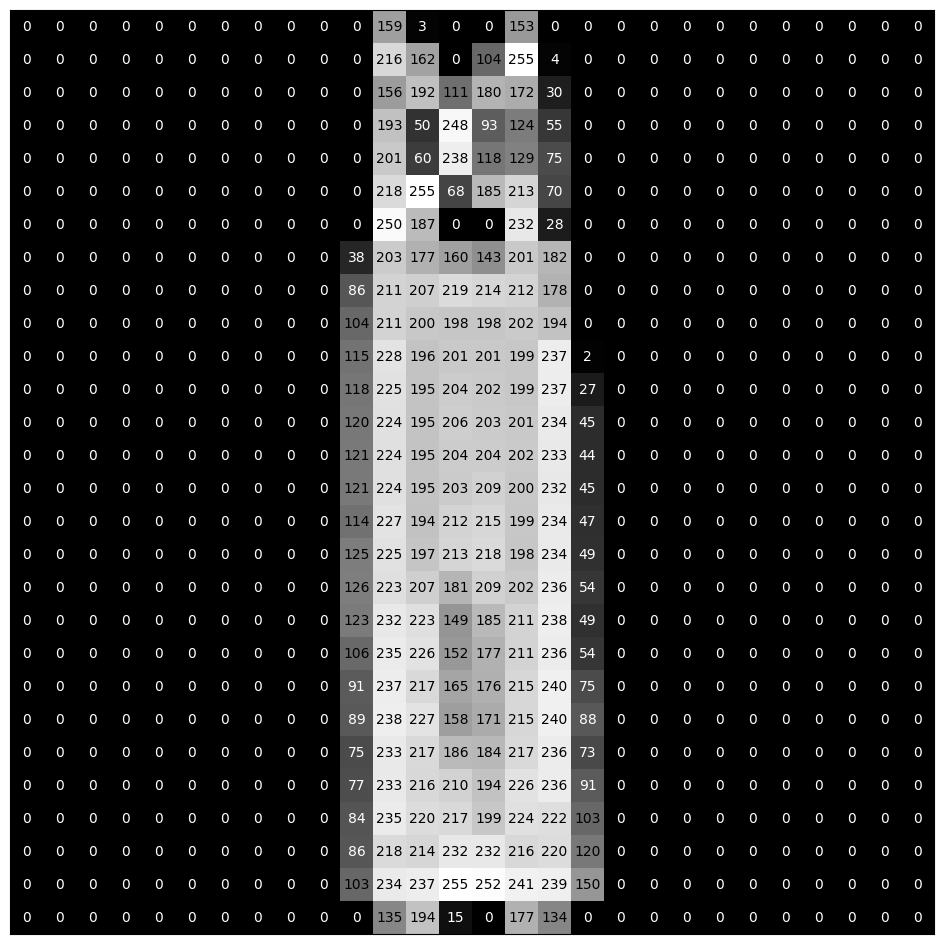

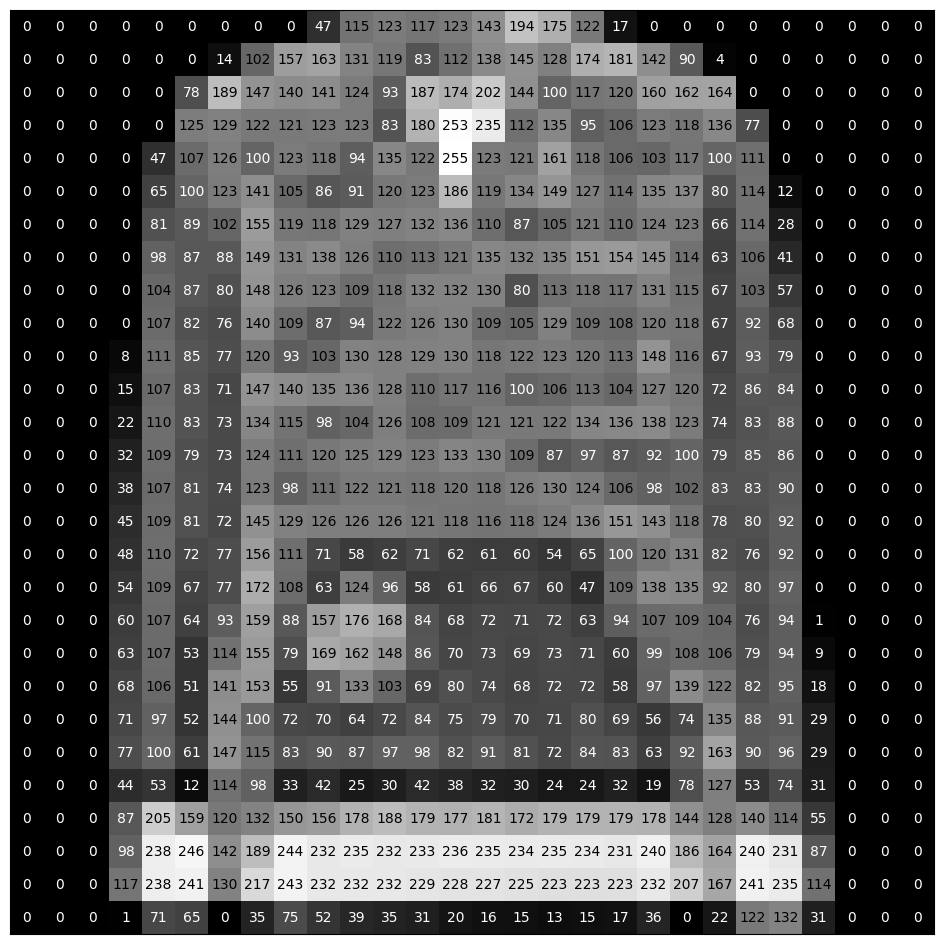

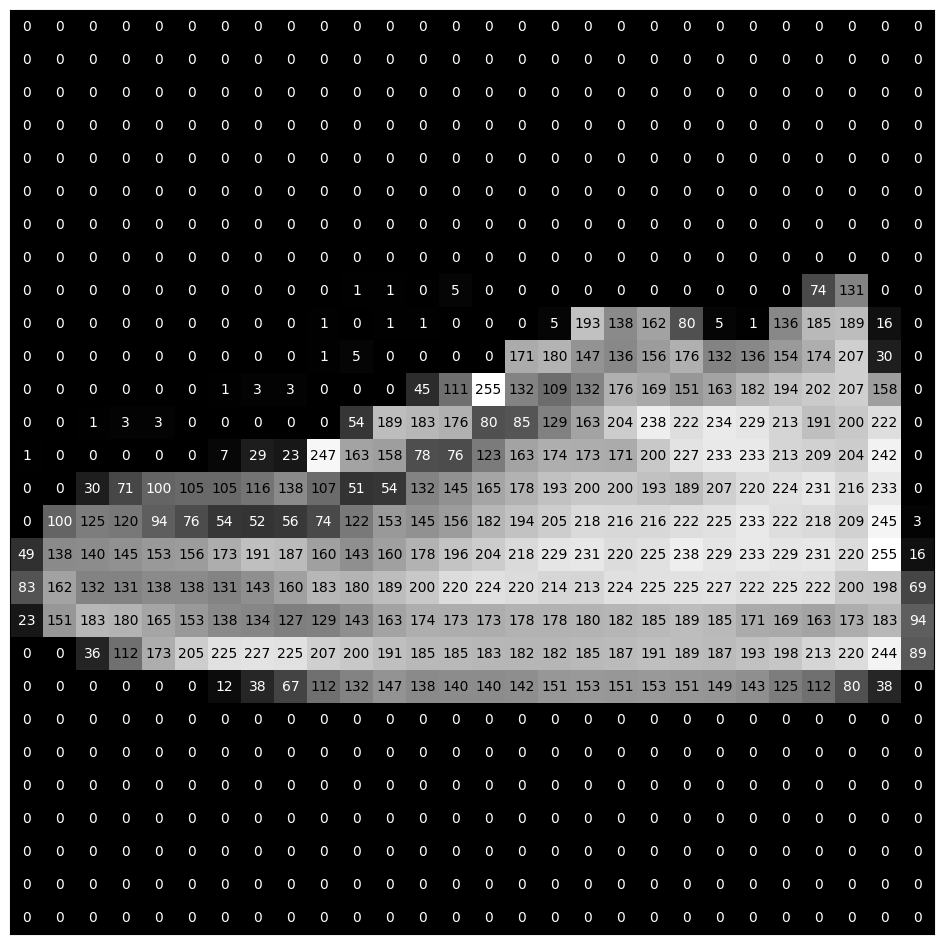

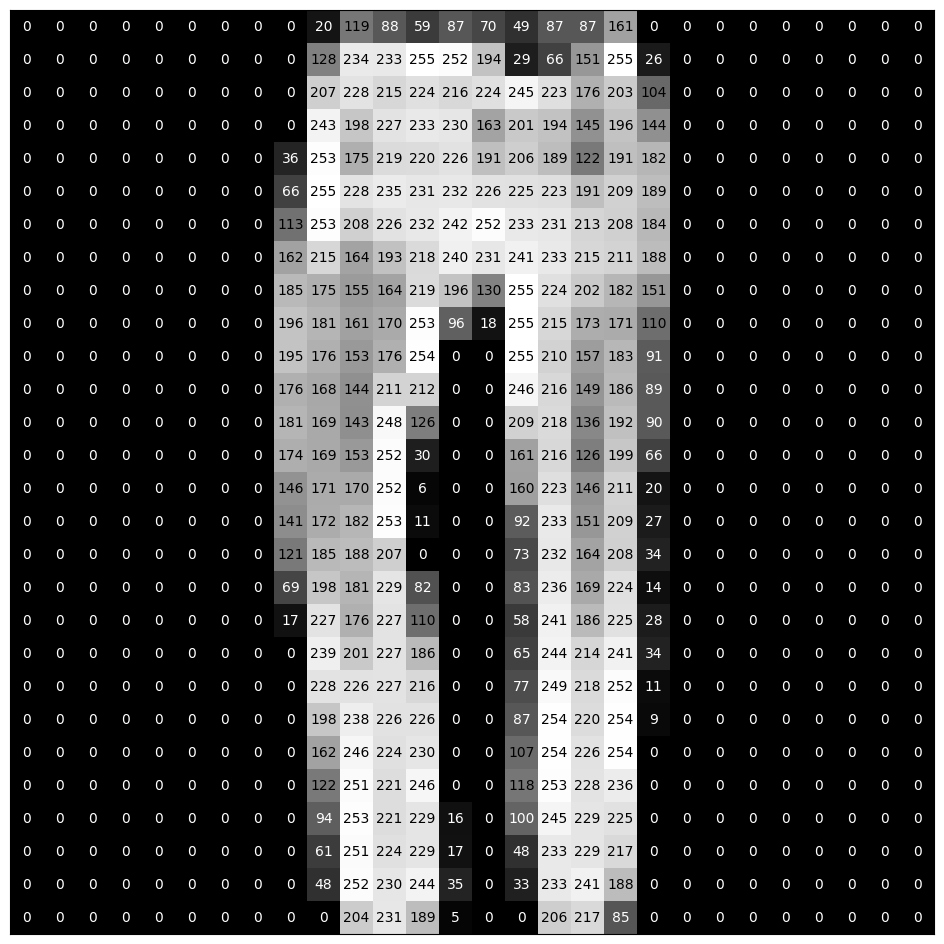

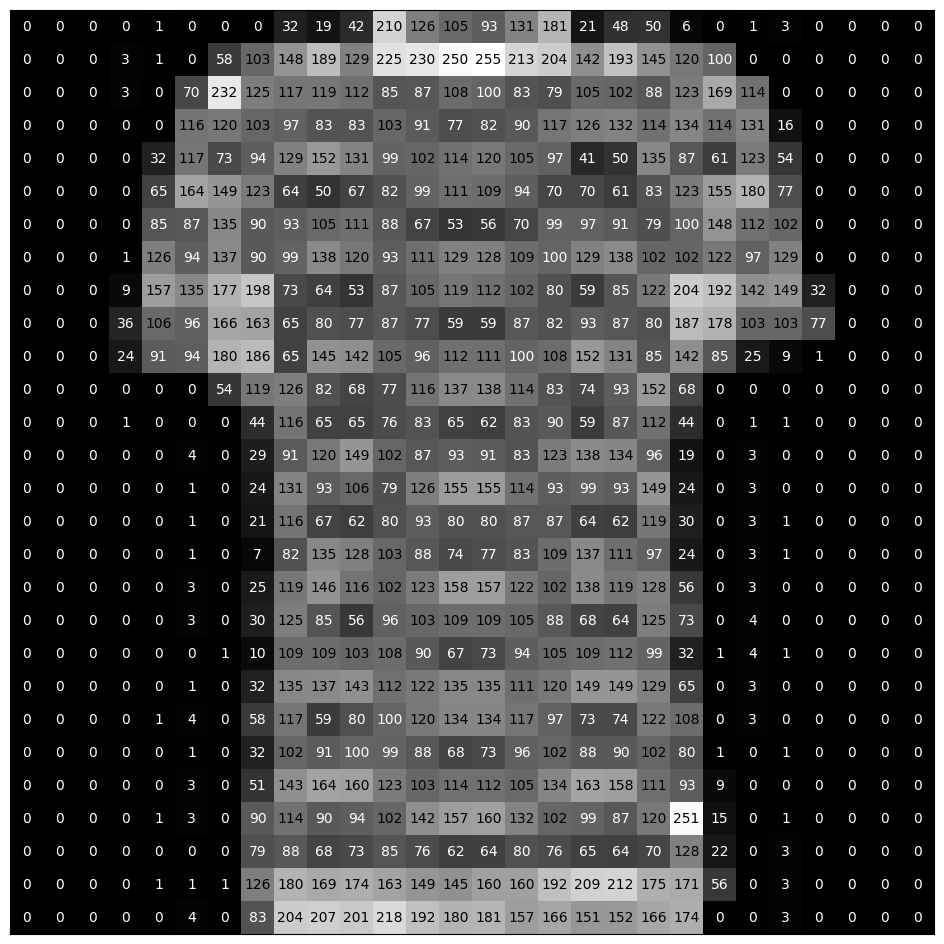

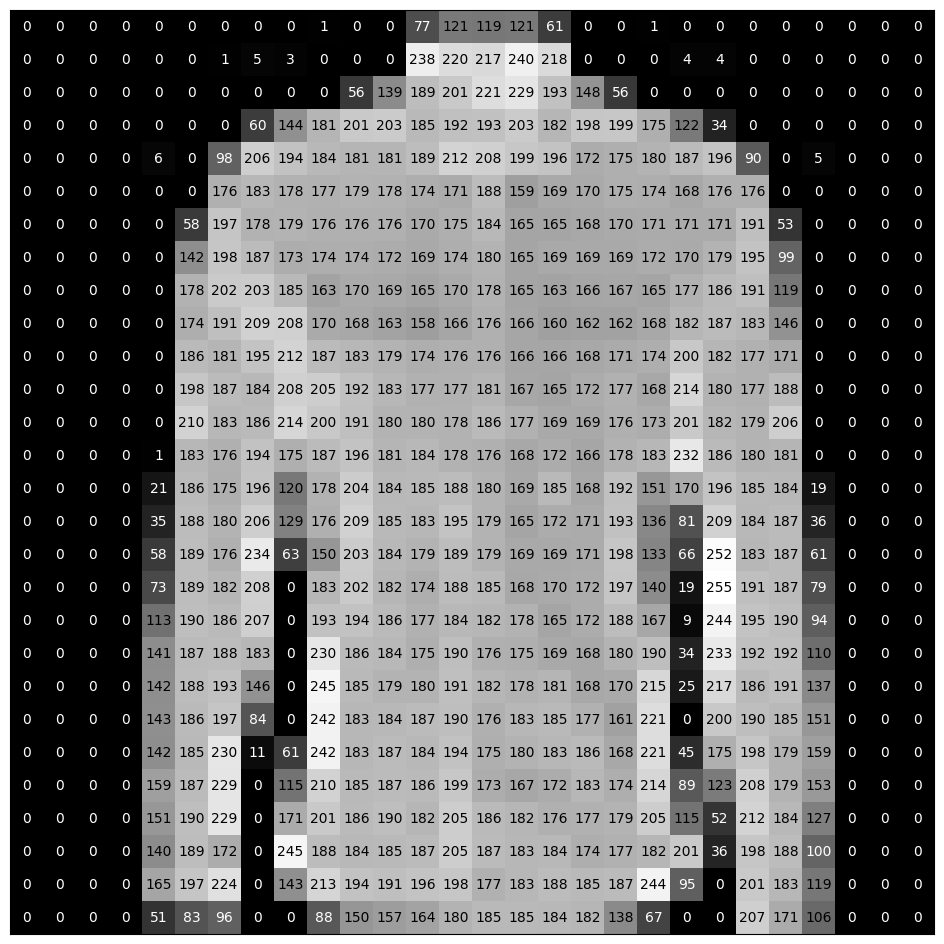

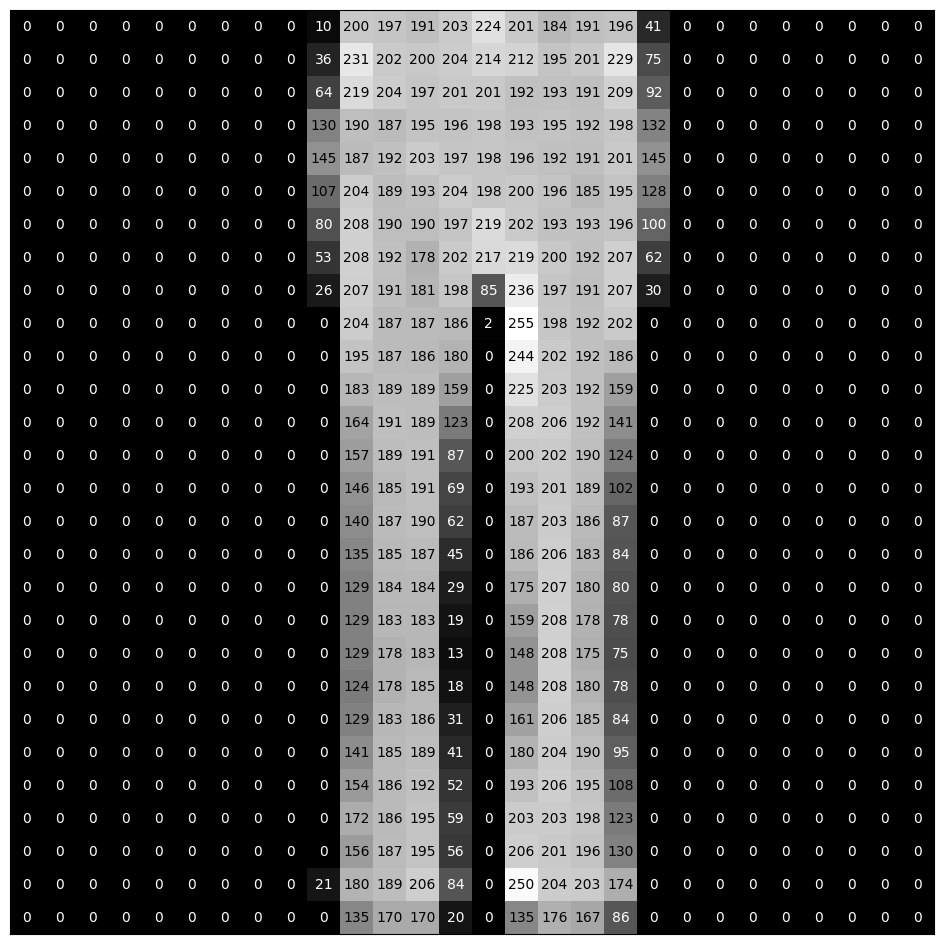

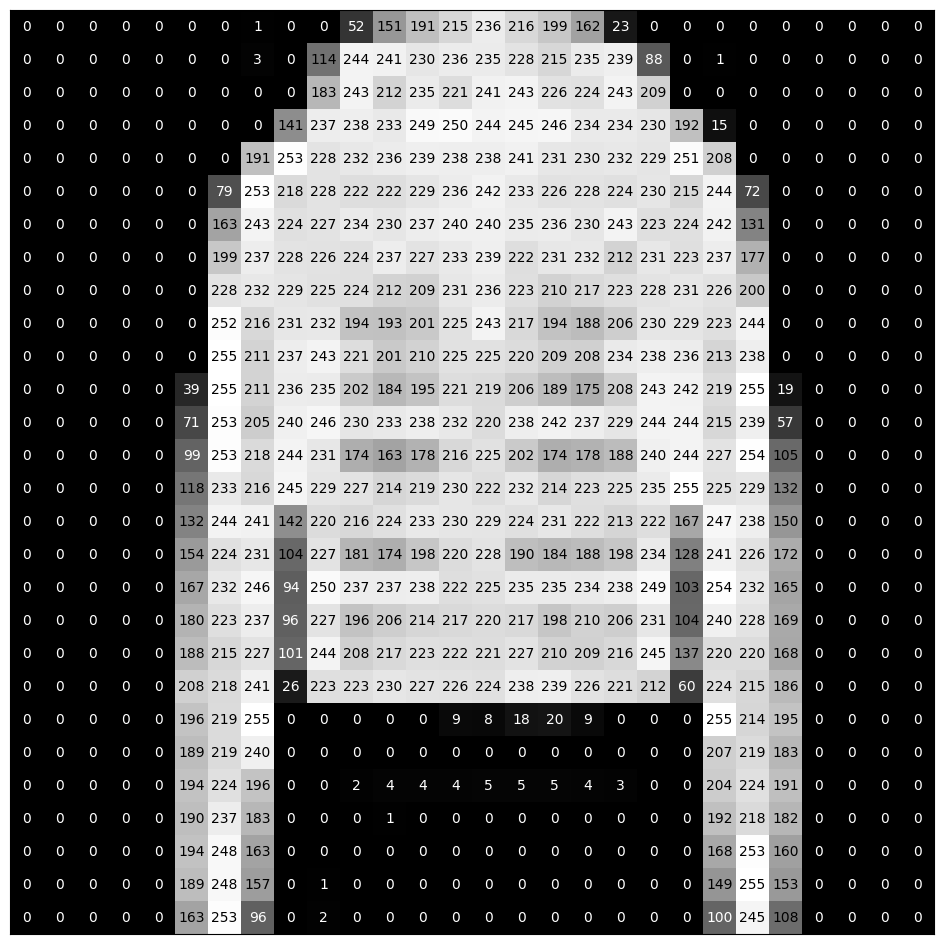

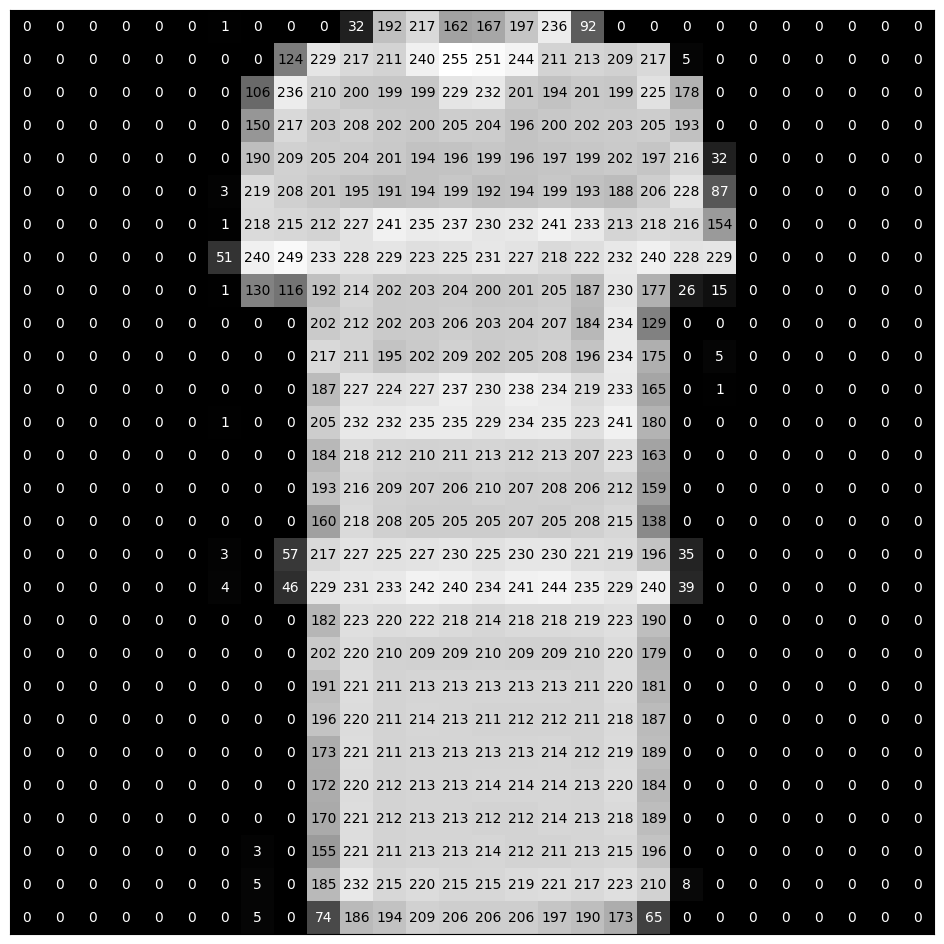

In [56]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb

for i in range(10):
    indices = np.where(train["label"] == i)[0][0]
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    
    visualize_input(indices, ax, y_train)

> Then I printed out the 10 images of each label (0-9) with excactly number of pixel, to see the color attribution. From this aspect, I observed that for shirts, long-sleeved, purses, and dresses, the distribution would display like a vertical rectangle. On the other hand, there would look like a horizontal rectangle for all three types of shoes.

In [57]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb

fig = px.pie(
    values=np.bincount(y_train),
    names=[str(i) for i in range(10)],
    title="Percentage of dataset per label",
)
fig.show()

In [58]:
y_train.value_counts()

label
2    4858
6    4842
1    4828
0    4798
4    4792
7    4791
5    4786
9    4781
8    4775
3    4749
Name: count, dtype: int64

> Third, according to the percentage shown in the graphics, this dataset is balanced for each type, with all types having 6000 data for training. I believe this is good news for the training model and predictions, as the model will treat every type equally and will not be affected by any particular label more than others

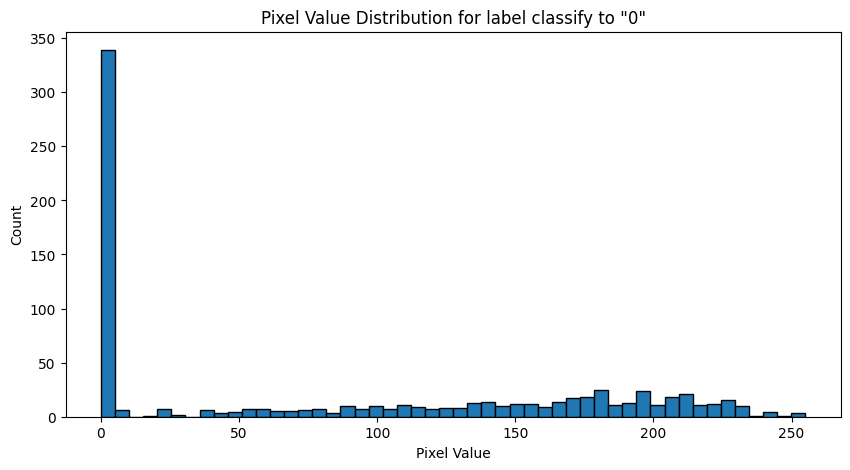

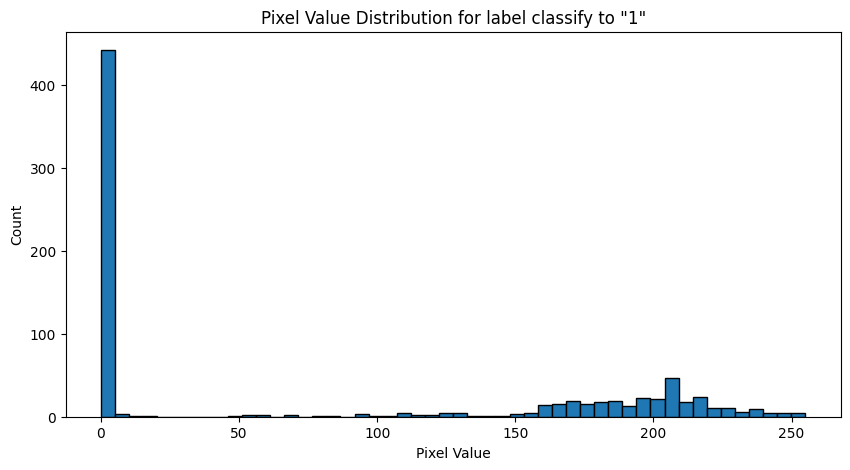

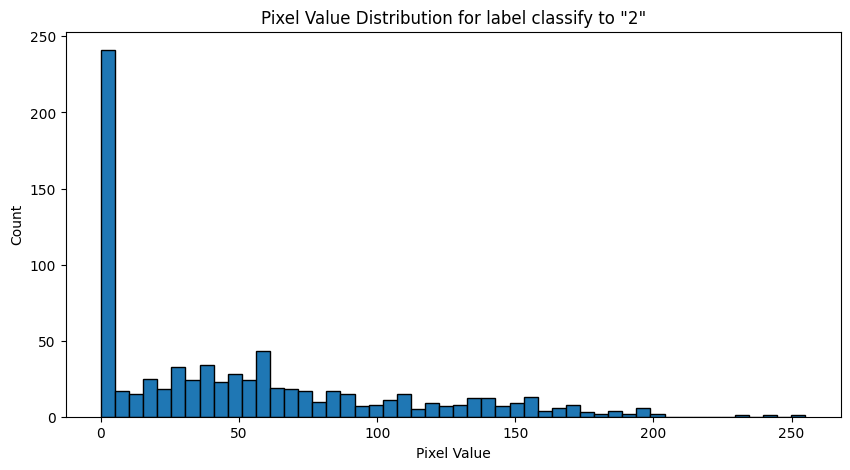

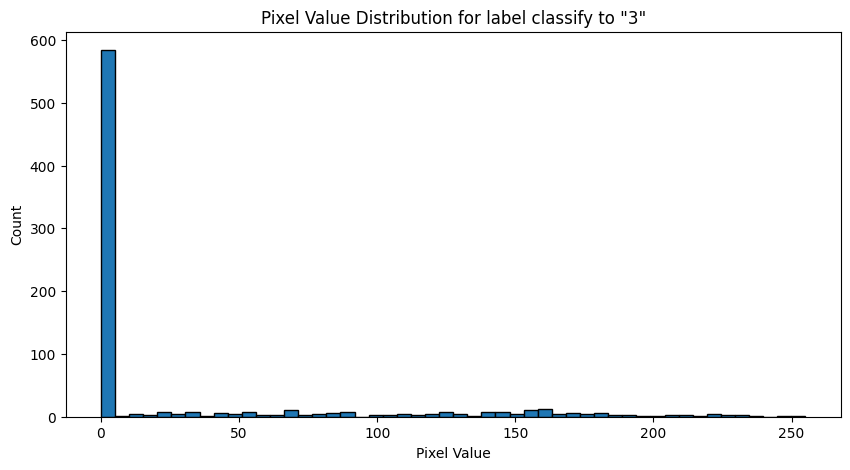

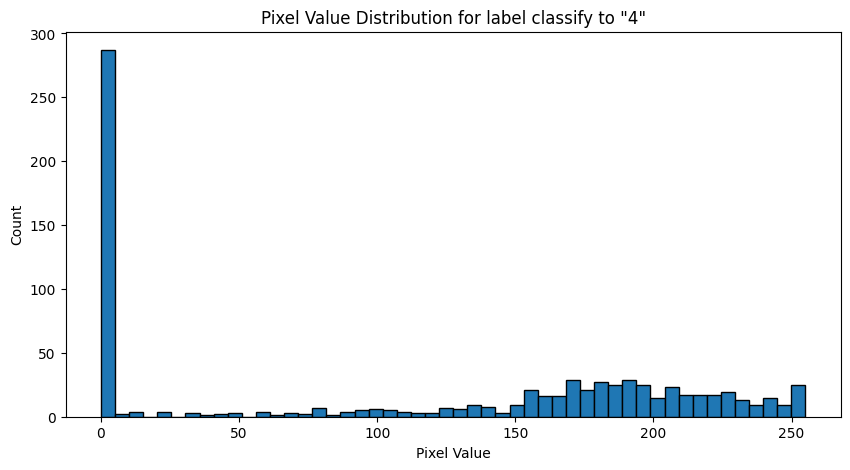

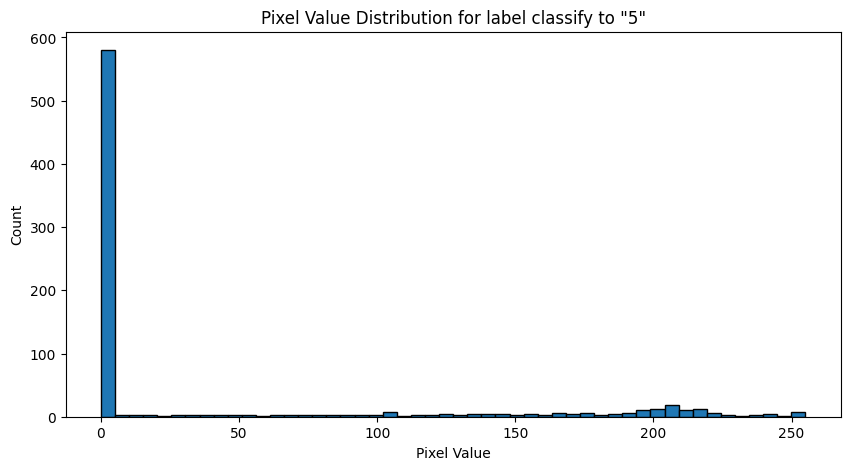

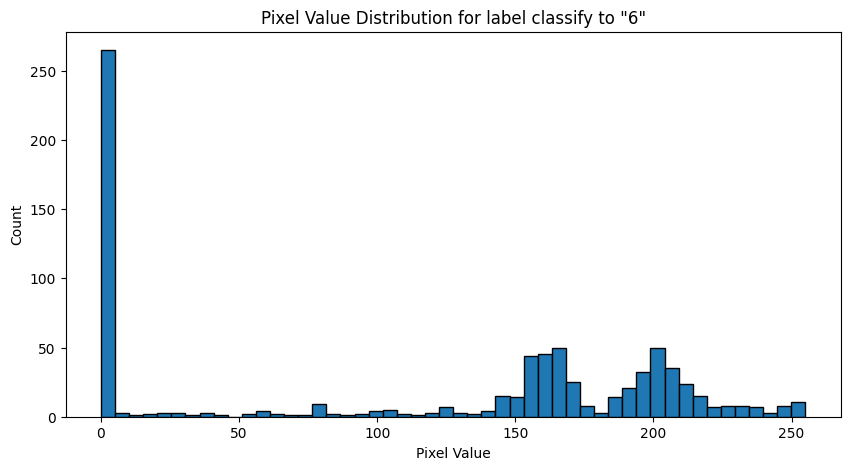

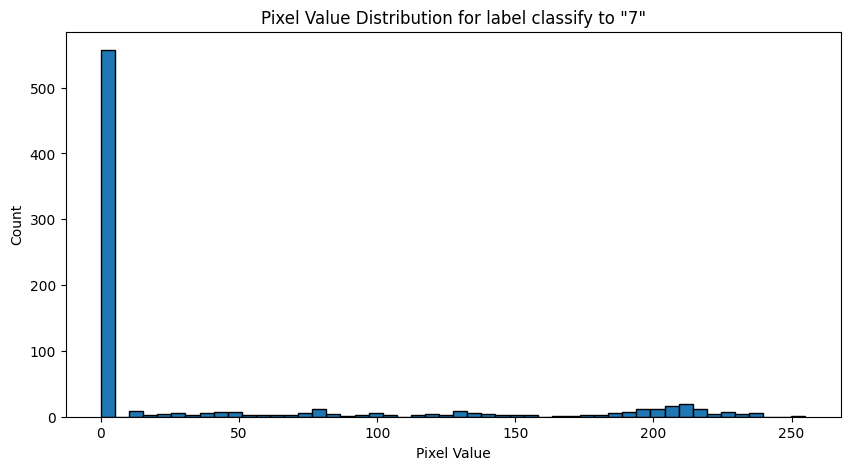

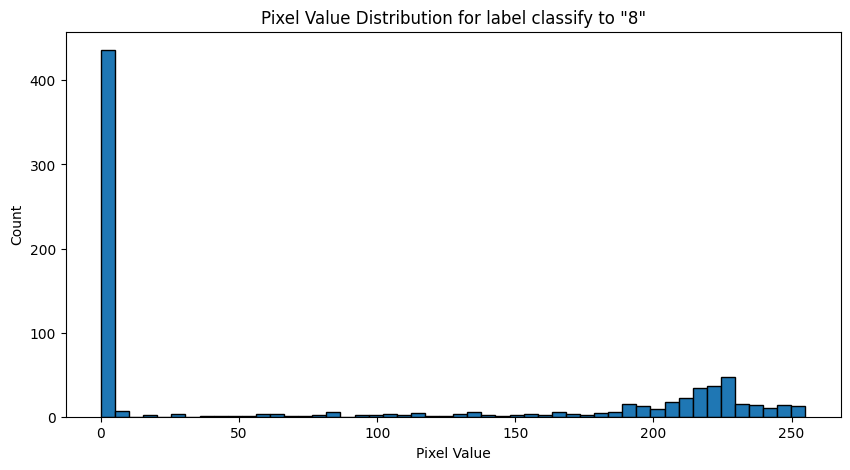

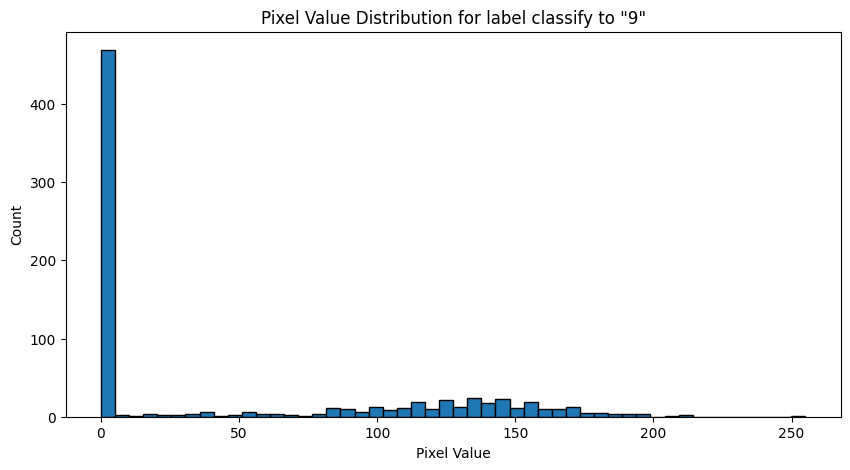

In [59]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb

for i in range(10):
    v = train.loc[train["label"] == i, train.columns[1:]].iloc[i]
    fig = plt.figure(figsize=(10, 5))
    plt.hist(v, bins=50, edgecolor="black")
    plt.title(f'Pixel Value Distribution for label classify to "{i}"')
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")
    plt.show()

> From this pixel distributions, we can easily see that for different types of labels, they would have the significant distribution from others. The only commonality is that the proportion of pixels being 0 is much higher compared to other numbers. Furthermore, the number of zeros also varies depending on the different labels, ranging from approximately 220 to around 560.

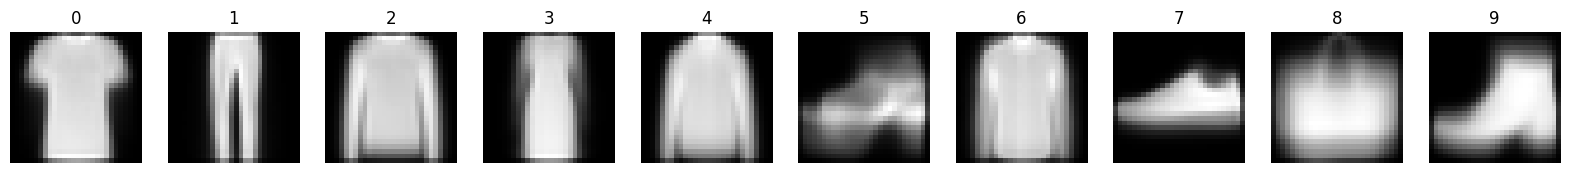

In [60]:
# Below code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/datasets/mnist.ipynb

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    avg_image = np.mean(X_train.values[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

> The last part shows a graphic displaying the average number of each pixel for each label (type). This method is useful for understanding that, on average, for all data of a specific type, the position of each pixel tends to be at certain values. For example, for label 1 or 2, the position of pixel 1 or any other pixel tends to have certain amount. Therefore, there are some clear examples to illustrate this. Except for label 5, the "average" images of other labels show a clear pattern of shirts, shoes, pants, and dresses. For label 5 (slippers), it indicates relatively vague pattern, I think the reason is that slippers usually have different design, such as covering the toes and heels or not or high heel or not.

### Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow.

Define the model

In [61]:
# high_acc_model = keras.Sequential([
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

Define the Loss Function, Optimizer and Metrics

In [62]:
# high_acc_model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

In [63]:
# high_acc_model.fit(X_train, y_train, epochs=5, batch_size=64)

In [64]:
### The following code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb, author by Professo Ran
checkpoint_filepath = 'best_model.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

In [65]:
### The following code is referenced from https://www.youtube.com/watch?v=i_LwzRVP7bg&list=PLAfsWbgbBHgaS02RqiLXdcjvYdLK_JXlS&index=2&t=8137s&ab_channel=freeCodeCamp.org
def train_model(X_train, y_train, num_nodes, dropout_prob, batch_size, epochs):
    nn_model = keras.Sequential(
        [
            layers.Dense(num_nodes, activation="relu"),
            layers.Dropout(dropout_prob),
            layers.Dense(num_nodes, activation="relu"),
            layers.Dropout(dropout_prob),
            layers.Dense(num_nodes, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )

    nn_model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = nn_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_data=(X_validation, y_validation),
        callbacks=[model_checkpoint_callback]
    )

    return nn_model, history

### Instead of just one neural network, explore 3 different neural networks (by changing any hyperparameter of your choice) 

In [68]:
### The following code is referenced from https://www.youtube.com/watch?v=i_LwzRVP7bg&list=PLAfsWbgbBHgaS02RqiLXdcjvYdLK_JXlS&index=2&t=8137s&ab_channel=freeCodeCamp.org
# lowest_loss = float("inf")
# least_loss_model = None
# history = None
epoch = 30
model_list = []

cc = list()

for num_nodes in [256, 512]:
    for dropout_prob in [0, 0.2]:
        for batch_size in [48, 96]:
            nn_model, history_in = train_model(
                X_train, y_train, num_nodes, dropout_prob, batch_size, epoch
            )
            eva_list = nn_model.evaluate(X_validation, y_validation)
            model_list.append(
                {
                    "model": nn_model,
                    "history": history_in,
                    "loss": eva_list[0],
                    "hyperparameters": {
                        "num_nodes": num_nodes,
                        "dropout_prob": dropout_prob,
                        "batch_size": batch_size,
                        "epoch": epoch,
                    },
                }
            )
            # if eva_list[0] < lowest_loss:
            #     lowest_loss = eva_list[0]
            #     least_loss_model = nn_model
            #     history = history_in

375/375 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.8683


In [72]:
top3_least_loss = heapq.nsmallest(3, model_list, key=lambda x: x['loss'])

In [75]:
top3_least_loss

[{'model': <keras.engine.sequential.Sequential at 0x1756daec990>,
  'history': <keras.callbacks.History at 0x175ab1d7a50>,
  'loss': 0.4916621148586273,
  'hyperparameters': {'num_nodes': 512,
   'dropout_prob': 0.2,
   'batch_size': 96,
   'epoch': 30}},
 {'model': <keras.engine.sequential.Sequential at 0x1756e50b250>,
  'history': <keras.callbacks.History at 0x1756dfaa150>,
  'loss': 0.49439677596092224,
  'hyperparameters': {'num_nodes': 256,
   'dropout_prob': 0.2,
   'batch_size': 96,
   'epoch': 30}},
 {'model': <keras.engine.sequential.Sequential at 0x1759c8de6d0>,
  'history': <keras.callbacks.History at 0x1759c3acd50>,
  'loss': 0.5895754098892212,
  'hyperparameters': {'num_nodes': 256,
   'dropout_prob': 0,
   'batch_size': 96,
   'epoch': 30}}]

### Plot the training and validation loss and accuracy for each one of them.

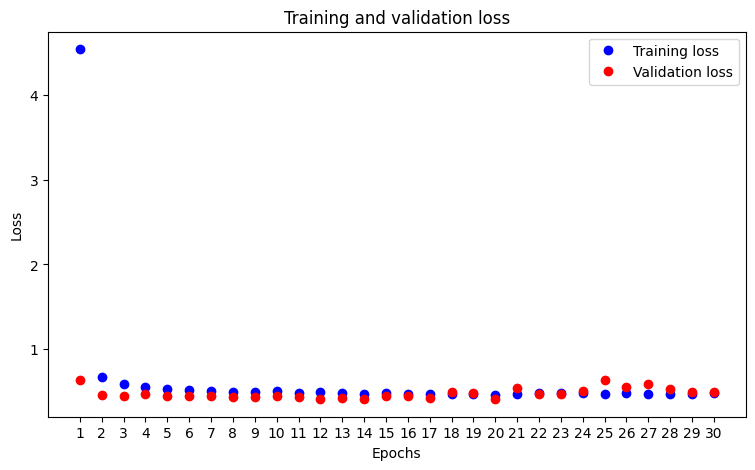

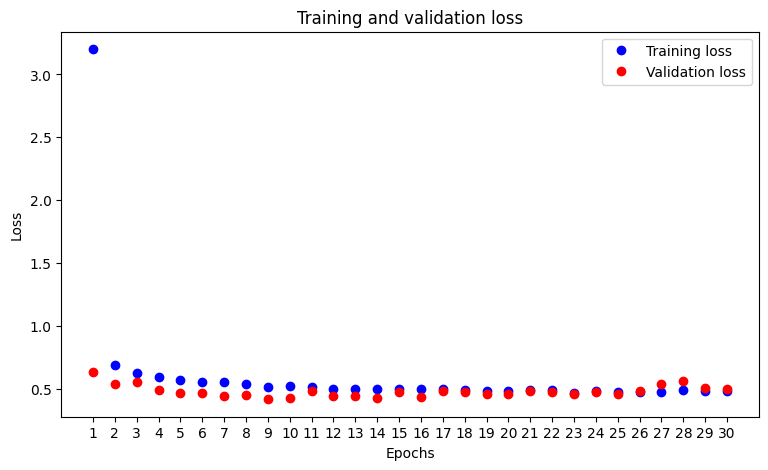

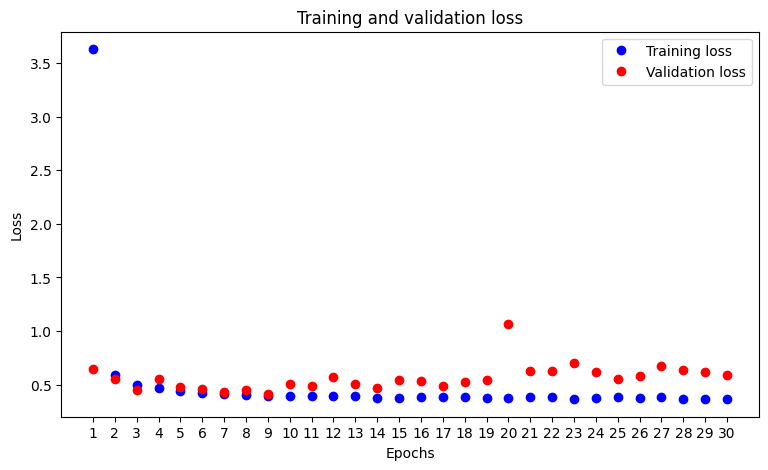

In [74]:
### The following code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb, author by Professo Ran

for item in top3_least_loss:
    history_dict = item['history'].history
    plt.figure(figsize=(9, 5))
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation loss of lowest validation loss')

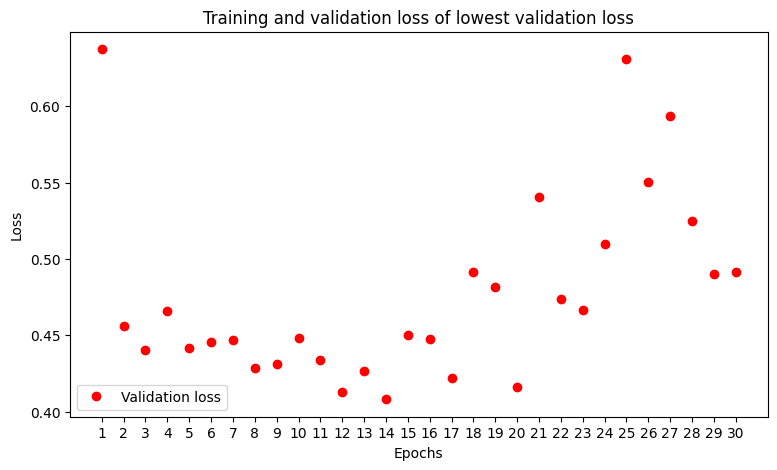

In [88]:
plt.figure(figsize=(9, 5))
val_loss_values = top3_least_loss[0]['history'].history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss of lowest validation loss")

### For each of the 3 identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting. Use the same reasoning as presented in class (Week 10, Class 2) - which is based on choosing the 'right' epoch.

> Above graphics are the loss values distribution with epochs from 1 to 30 of top 3 lowest loss of my custom model distinguished by different `num_nodes`, `dropout_prob`, `batch_size`,`epoch`. The first one is the lowest loss, there is a interesting fact that from epoch 2 to 17, the validation loss are always lower than training loss, which means the error of when model training on training data set would higher than the error of validating on validation data set. <br><br>
> Then after this, we also can found that when epoch higher than 14, the loss would be higher and higher, which represents that when the epoch more higher and validation loss also, the model is overfitting to original data set (training data set). <br><br>
> So, based on this founding, I would choose the best epoch for current model from 12 or 14. Lastly, it is easily to compare the lowest loss between 12 and 14, the 14 epochs has the lowest loss. So the best number of epochs for current data set is 14.

### With the best model chosen above, and using its best weights as found above (see saving and loading a model), run the evaluation as requested in lab 8

In [89]:
### The following code is referenced from https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb, author by Professo Ran
from keras.models import load_model

best_model = load_model('best_model.hdf5') 
best_model

### Evaluation
Accuracy

In [107]:
y_pred = best_model.predict(X_validation)
y_pred = [ prob_list.argmax() for prob_list in y_pred ]

accuracy = (y_validation == y_pred).value_counts()[True] / len(y_validation)

f"The accuracy calculated with test dataset is: {round(accuracy * 100, 4)}%"

375/375 [==============================] - 1s 2ms/step


'The accuracy calculated with test dataset is: 86.4%'

Confusion metric: Using 5 or non-5

In [108]:
pred_target = 5

y_train_specific = y_train == pred_target
y_validation_specific = y_validation == pred_target

best_model.fit(X_train, np.ravel(y_train_specific))
y_pred_5 = best_model.predict(X_validation)

y_pred_5 = [ bool(prob_list.argmax()) for prob_list in y_pred_5 ]

tn, fp, fn, tp = confusion_matrix(y_validation_specific, y_pred_5).ravel()


df = pd.DataFrame(
    {
        "Actual Values: Positive": [tp, fp],
        "Actual Values: Negative": [fn, tn],
    }
)

df.style.relabel_index(
    ["Predicted Values: Positive", "Predicted Values: Negative"], axis=0
)




375/375 [==============================] - 1s 2ms/step


,Actual Values: Positive,Actual Values: Negative
Predicted Values: Positive,1126,88
Predicted Values: Negative,14,10772


Precision, recall and F1 for each class

In [109]:
for i in range(1, 10):
    y_train_specific_ = y_train == i
    y_validation_specific_ = y_validation == i

    best_model.fit(X_train, np.ravel(y_train_specific_))
    y_pred_specific_ = best_model.predict(X_validation)
    y_pred_specific_ = [ bool(prob_list.argmax()) for prob_list in y_pred_specific_ ]

    print(
        f"Model for predict {i} or non-{i} performance: \n  {classification_report(y_validation_specific_, np.ravel(y_pred_specific_))}"
    )

375/375 [==============================] - 1s 2ms/step
Model for predict 1 or non-1 performance: 
                precision    recall  f1-score   support

       False       1.00      1.00      1.00     10828
        True       0.99      0.96      0.98      1172

    accuracy                           1.00     12000
   macro avg       0.99      0.98      0.99     12000
weighted avg       1.00      1.00      1.00     12000

375/375 [==============================] - 1s 2ms/step
Model for predict 2 or non-2 performance: 
                precision    recall  f1-score   support

       False       0.95      0.99      0.97     10858
        True       0.89      0.54      0.67      1142

    accuracy                           0.95     12000
   macro avg       0.92      0.77      0.82     12000
weighted avg       0.95      0.95      0.94     12000

375/375 [==============================] - 1s 2ms/step
Model for predict 3 or non-3 performance: 
                precision    recall  f1-score   

> The accuracy calculated with the test set X_test is 86.4%. Compared to training the model with specific-value or non-specific-value results, it is relatively high and performs greatly. Like same situation from pro-difinded model provided by scikit learn. When we use model on binary and multiclass classification, the performance on binary would always better than the performance on multiclass classification. ~~Therefore, we can infer that for the current customer model built by keras, it may perform better on multiclass classification tasks rather than binary classification.~~ <br><br>
> Furthermore, look into to the results of precision, recall and f1-score (with binary classification tasks), it performs relatively poor prediction evaluations, which is ~~poor~~ much good as the model provides by scikit learn. <br><br>
> Last but not least, when model experienced more than one neural network, it would has a good improvment on performance, not only on binary classification but on multiclass classification. ~~Last but not least, this customized model not only provides 85% accuracy on binary classification tasks but provides similar performance on multiclass classification, even multiclass classification better than binary classification tasks. In the previous case (with the model provided by scikit-learn), when we predict binary classification, it usually provides higher accuracy than multiclass classification.~~

### Run the model on the test set, and provide clear and relevant conclusions

'hyperparameters': {'num_nodes': 512,
   'dropout_prob': 0.2,
   'batch_size': 96,
   'epoch': 30}},



   history = nn_model.fit(
        X_train,
        y_train,
        epochs=30,
        batch_size=96,
        verbose=0,
    )

In [112]:
best_model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=96,
)
y_pred_test = best_model.predict(X_test)
y_pred_test = [prob_list.argmax() for prob_list in y_pred_test]
accuracy = (y_test == y_pred_test).value_counts()[True] / len(y_test)
f"The accuracy calculated with test dataset is: {round(accuracy * 100, 4)}%"

313/313 [==============================] - 1s 3ms/step


'The accuracy calculated with test dataset is: 85.31%'

(array([ 29.,  36., 129., 142., 305.,  66., 586.,  26.,  67.,  83.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

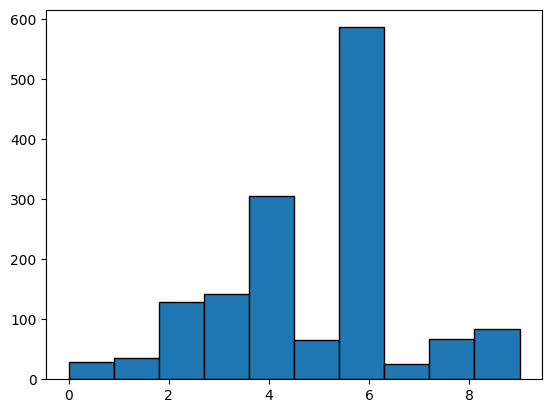

In [113]:
filter = y_test != y_pred_test
plt.hist(y_test[filter], bins=10, edgecolor='black')

> The result of predicting on the test set is 85.31%, which is relatively good accuracy. Upon analyzing the wrong predictions, I found that three labels are most frequently predicted incorrectly: 2, 4 and 6, representing all types of long-sleeved clothing. However, it is could aceptable since three types of long-sleeve are really similar to each othter.  In conclusion, This customized model sometimes inaccurately identifies tops (especially on long-sleeved), but aside from that, it maintains a high accuracy rate in identifying other clothing types such as pants, shoes, bags, dresses, etc.

### What if we wanted to increase the precision and recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

In [106]:
from sklearn.metrics import precision_score, recall_score

y_train_specific_ = y_train == 5
y_validation_specific_ = y_validation == 5

best_model.fit(X_train, np.ravel(y_train_specific_))

def modify_pre_rec(x, y, threshold_list: list):
    
    probabilities = best_model.predict(x)
    probabilities = probabilities[:, 1]

    y_true = (y == 5).astype(int)
    
    old_precision = precision_score(y_true, probabilities >= 0.5)
    old_recall = recall_score(y_true, probabilities >= 0.5)

    for threshold in threshold_list:
        y_pred_adjusted = [1 if prob >= threshold else 0 for prob in probabilities]

        adjusted_precision = precision_score(y_true, y_pred_adjusted)
        adjusted_recall = recall_score(y_true, y_pred_adjusted)

        print(f"Modify threshold from 0.5 to {threshold} ---------------------------")
        print(f"Precision: {old_precision} -> {adjusted_precision}")
        print(f"Recall: {old_recall} -> {adjusted_recall}\n")
        
modify_pre_rec(X_validation, y_validation, [0.9, 0.1])

375/375 [==============================] - 1s 1ms/step
Modify threshold from 0.5 to 0.9 ---------------------------
Precision: 0.9382518043303929 -> 0.9515996718621821
Recall: 0.9637561779242174 -> 0.9555189456342669

Modify threshold from 0.5 to 0.1 ---------------------------
Precision: 0.9382518043303929 -> 0.9233776387802971
Recall: 0.9637561779242174 -> 0.9728171334431631

